In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path="pl_standings.csv"
 
df = pd.read_csv(path)
print(df)

df['GD'] = df['GF'] - df['GA']
X = df['GD'].values.reshape(-1,1)
y = df['Rk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2,
random_state=42)




     Rk           Squad  MP   W   D   L  GF  GA  Pts  Attendance  \
0     1  Manchester Utd  38  25   7   6  73  35   82       41001   
1     2   Newcastle Utd  38  24   6   8  66  37   78       36501   
2     3       Liverpool  38  20  11   7  70  34   71       39553   
3     4     Aston Villa  38  18   9  11  52  35   63       37492   
4     5         Arsenal  38  17  12   9  49  32   63       32614   
..   ..             ...  ..  ..  ..  ..  ..  ..  ...         ...   
495  16        West Ham  38  10   9  19  49  62   39       44155   
496  17     Aston Villa  38   9   8  21  41  67   35       28505   
497  18     Bournemouth  38   9   7  22  40  65   34        7745   
498  19         Watford  38   8  10  20  36  64   34       15353   
499  20    Norwich City  38   5   6  27  26  75   21       19913   

          Top Team Scorer        Goalkeeper  Year  
0       Eric Cantona - 14  Peter Schmeichel  1996  
1      Les Ferdinand - 25      Shaka Hislop  1996  
2      Robbie Fowler - 28  

In [32]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
model=linearRegression.fit(X, y)
m = linearRegression.predict(X_test[:10])
n = y_test[:10].values
print('Prediction\tActual Value')
for i in range(10):
 print("%.2f\t\t\t%f"%(m[i], n[i]))
r2_Score = linearRegression.score(X_test, y_test)
print(r2_Score)

Prediction	Actual Value
-0.38			2.000000
11.57			14.000000
15.20			15.000000
11.57			16.000000
7.30			5.000000
15.41			15.000000
17.76			18.000000
7.09			5.000000
11.78			9.000000
12.63			11.000000
0.7877631768613127


In [33]:
import statsmodels.api as sm      
x_train = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Rk   R-squared (uncentered):                   0.202
Model:                            OLS   Adj. R-squared (uncentered):              0.200
Method:                 Least Squares   F-statistic:                              101.0
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    2.44e-21
Time:                        15:09:35   Log-Likelihood:                         -1514.2
No. Observations:                 400   AIC:                                      3030.
Df Residuals:                     399   BIC:                                      3034.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2159      0.021    -10.052      0.000      -0.258      -0.174
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.185
Skew:                           0.038   Prob(JB):                        0.912
Kurtosis:                       2.926   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
intercept = model.intercept_
slope = model.coef_

In [35]:
y_pred = intercept + slope*X

Text(0.5, 1.0, 'Evaluating the Relationship Between Goal Differential and League Table Rank\nPremier League Seasons 1995/96 - 2019/20')

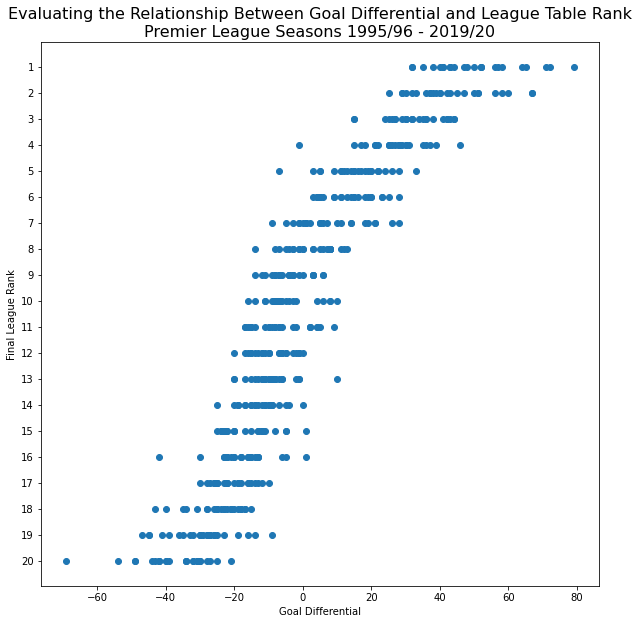

In [37]:
fig,ax = plt.subplots(figsize=(10,10))

plt.scatter(X,y)


plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.gca().invert_yaxis()

plt.xlabel('Goal Differential')
plt.ylabel('Final League Rank')
plt.title('Evaluating the Relationship Between Goal Differential and League Table Rank\nPremier League Seasons 1995/96 - 2019/20',ha='center',fontsize=16)
